

>Importing Dependencies



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Loading the data from dataset csv file

In [ ]:
dataset = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.shape

(200, 5)

In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Eliminating unnecessary features 1. customer id ,2. gender , 3. Age

In [ ]:
X = dataset.iloc[:,[3,4]].values

In [ ]:
for i in range(5):
  print(X[i])
    

[15 39]
[15 81]
[16  6]
[16 77]
[17 40]


To find the number of cluster , we will be using elbow method.
For this we will plot Cost function vs no.of clusters. For calculating cost first we need to calculate Kmeans for various cluster numbers.

WCSS ->> Within clusters sum of squares

In [ ]:
cost = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 2)
  kmeans.fit(X)
  cost.append(kmeans.inertia_)

Plotting the graph cost vs no. of clusters

<function matplotlib.pyplot.show(*args, **kw)>

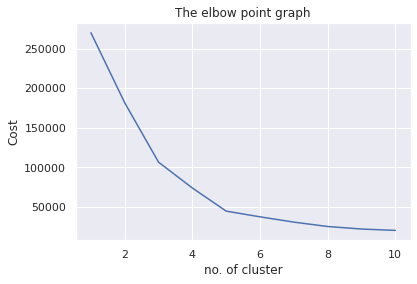

In [ ]:
sns.set()
plt.plot(range(1,11),cost)
plt.title('The elbow point graph')
plt.xlabel('no. of cluster')
plt.ylabel('Cost')
plt.show

From elbow point graph , we can take the optimum number of clusters as 5

In [ ]:
model = KMeans(n_clusters = 5,init = 'k-means++',random_state = 4)

Returning a label for each data point based on their cluster number

In [ ]:
Y = model.fit_predict(X)
print(Y)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 0 4 2 4 2 4 0 4 2 4 2 4 2 4 2 4 0 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


Visualizing the data

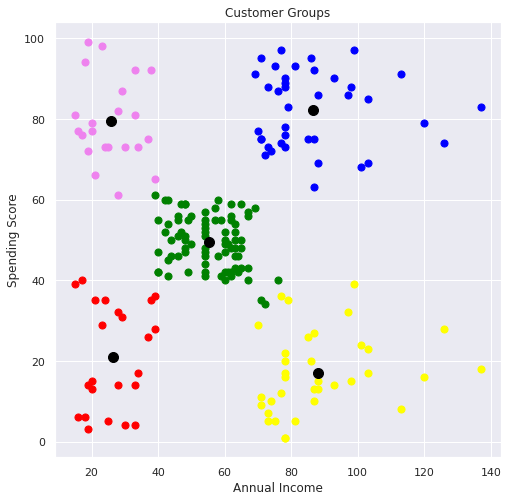

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()